## Exercise 1

Using regular expressions, extract all names from the dataset `yob2012.txt` (including the number of newborns registered in 2012 with their names and sex), which start with letters A to C. How many names did you find?

In [1]:
import re

count = 0
with open("yob2012.txt") as f:
  pattern = r"^[A-Ca-c]\w*,[MF],\d*12$\n"
  for row in f.readlines():
    if re.search(pattern, str(row)):
      count += 1
print(count)

212


## Exercise 2

1. Write a generator function that generates prime numbers infinitely.
2. Write a generator function that generates a sequence of powers of a given base up to a given exponent. Then pipelining with generator double function which double the sequence from previous generator.

In [2]:
def is_prime(n):
  if n < 2:
    return False

  for i in range(2, n):
    if n % i == 0:
      return False

  return True

def prime_numbers_generator():
  num = 2
  while True:
    if is_prime(num):
      yield num
    num += 1

try:
  for num in prime_numbers_generator():
    print(num, end=" ")
except KeyboardInterrupt:
  print()

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 113 127 131 137 139 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953 967 971 977 983 991 997 1009 1013 1019 1021 1031 1033 1039 1049 1051 1061 1063 1069 1087 1091 1093 1097 1103 1109 1117 1123 1129 1151 1153 1163 1171 1181 1187 1193 1201 1213 1217 1223 1229 1231 1237 1249 1259 1277 1279 1283 1289 1291 1297 1301 1303 1307 1319 1321 1327 1361 1367 1373 1381 1399 1409 1423 1427 1429 1433 1439 1447 1451 1453 1459 1471 1481 1483 1487 1489 1493 1499 15

In [ ]:
def powers(base, exponent):
  for e in range(exponent + 1):
    yield base ** e

def double_sequence(powers):
  for n in powers:
    yield n * 2

sequence = powers(2, 3)
print(*double_sequence(sequence))

2 4 8 16


## Exercise 3

Given a data `uoe_tweets_07022019`, let do the following tasks:
1. Remove the `screen_name` and `created_at` columns.
2. It would be interesting to see how frequently the university has made posts. Can you group all posts according to their date of publication and then create a plot through time of how many posts have been made each day. </br>
You can use the `DataFrame.groupby()` method to find occurrences. Don't forget to label the axis of your plot. </br>
You can transfrom a `DataFrame.groupby()` object back into a DataFrame by using its `.count()` method
3. We would like to identify the 10 most favourited posts. This can easily be done using the [`nlargest`](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html) method and then simply indexing into the original dataframe. </br>
Find the 10 most popular posts, print them and see what they are about. </br>
You might want to use the `.iloc` method to index into the original data

In [95]:
import csv

with open("uoe_tweets_07022019.csv") as f_input, open("output_1.csv", "w") as f_output:
  reader = csv.DictReader(f_input)
  headers = reader.fieldnames
  headers = list(filter(lambda h: h != "screen_name" and h != "created_at", headers))

  writer = csv.DictWriter(f_output, fieldnames=headers)
  writer.writeheader()

  for row in reader:
    content = {h: row[h] for h in headers}

    writer.writerow(content)

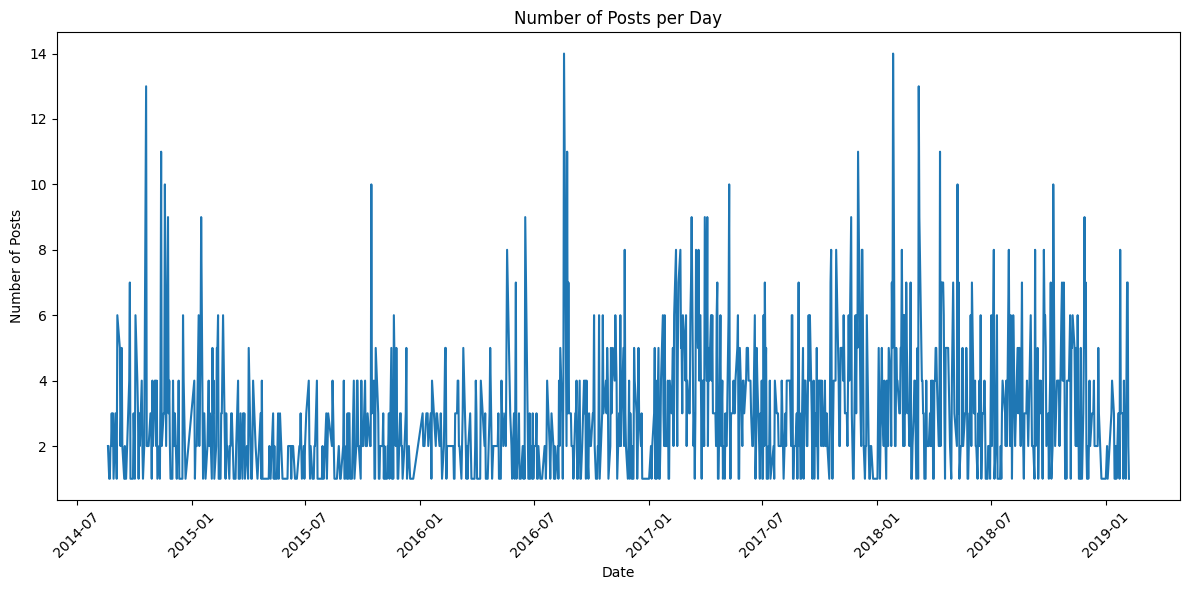

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("uoe_tweets_07022019.csv")
df['created_at'] = pd.to_datetime(df['created_at'])

df['date_only'] = df['created_at'].dt.date
posts_count = df.groupby('date_only').size()

posts_count.plot(kind="line", figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.title("Number of Posts per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
top_10_index = df['favorite_count'].nlargest(10).index
top_10_posts = df.iloc[top_10_index]
pd.DataFrame(top_10_posts)

,Unnamed: 0,text,screen_name,created_at,retweet_count,favorite_count,date_only
2625,2625,Tickets now available for public talk by Bolly...,EdinburghUni,2015-10-05 15:36:26,1764,3725,2015-10-05
1434,1434,"Congratulations to Canadian PM @JustinTrudeau,...",EdinburghUni,2017-07-05 13:00:31,650,2553,2017-07-05
1320,1320,Scientists have developed a camera that can se...,EdinburghUni,2017-09-04 10:05:44,546,798,2017-09-04
591,591,We’re ranked in world top 20 in the QS​ World ...,EdinburghUni,2018-06-06 20:15:03,273,574,2018-06-06
1033,1033,We’re number 2 on the @timeshighered list of 1...,EdinburghUni,2018-01-03 11:20:03,183,522,2018-01-03
1688,1688,"""Edinburgh is and will remain a proudly #Europ...",EdinburghUni,2017-03-29 14:55:02,355,492,2017-03-29
1594,1594,Celebrate dance today for the #InternationalDa...,EdinburghUni,2017-04-29 10:33:35,379,478,2017-04-29
2606,2606,"Congratulations Dr Shah Rukh Khan, honorary gr...",EdinburghUni,2015-10-15 15:00:25,648,474,2015-10-15
1034,1034,"Wishing all of our students, staff &amp; frien...",EdinburghUni,2018-01-01 00:05:03,98,463,2018-01-01
965,965,Bill Gates says some of the world’s best resea...,EdinburghUni,2018-01-26 17:37:56,195,448,2018-01-26
